**완전 연결 계층 AE 모델링**

In [1]:
from keras import layers, models

In [2]:
class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        input_shape = (x_nodes, )

        x = layers.Input(shape=input_shape)
        z = layers.Dense(z_dim, activation='relu')(x)
        y = layers.Dense(x_nodes, activation='sigmoid')(z)

        super(AE, self).__init__(x, y)

        self.x = x
        self.z = z
        self.z_dim = z_dim

        self.compile(
            optimizer='adadelta',
            loss='binary_crossentropy',
            metrics=['acc']
        )

    def Encoder(self):
        return models.Model(self.x, self.z)

    def Decoder(self):
        z_shape = (self.z_dim, )
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)

In [3]:
from keras.datasets import mnist
import numpy as np

In [4]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc=0)


def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc=0)

def show_ae(autoencoder):
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()

    encoded_imgs = encoder.predict(X_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):
        ax = plt.subplot(3, n, i+1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i+1+n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i+1+n+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [7]:
def main():
    x_nodes = 784
    z_dim = 36

    autoencoder = AE(x_nodes, z_dim)
    history = autoencoder.fit(
        X_train, X_train,
        epochs=10, batch_size=256, shuffle=True,
        validation_data=(X_test, X_test)
    )

    plot_acc(history)
    plt.show()

    plot_loss(history)
    plt.show()

    show_ae(autoencoder)
    plt.show()

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6947 - acc: 4.1667e-04 - val_loss: 0.6947 - val_acc: 5.0000e-04

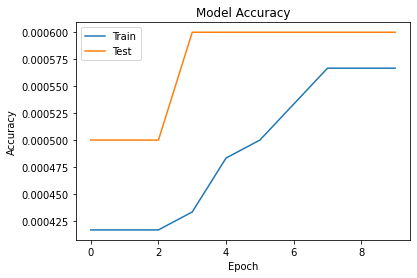

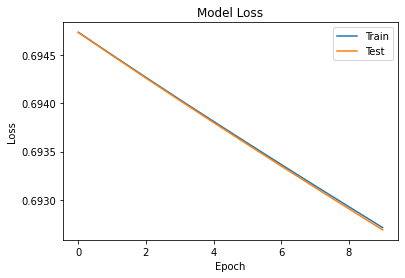

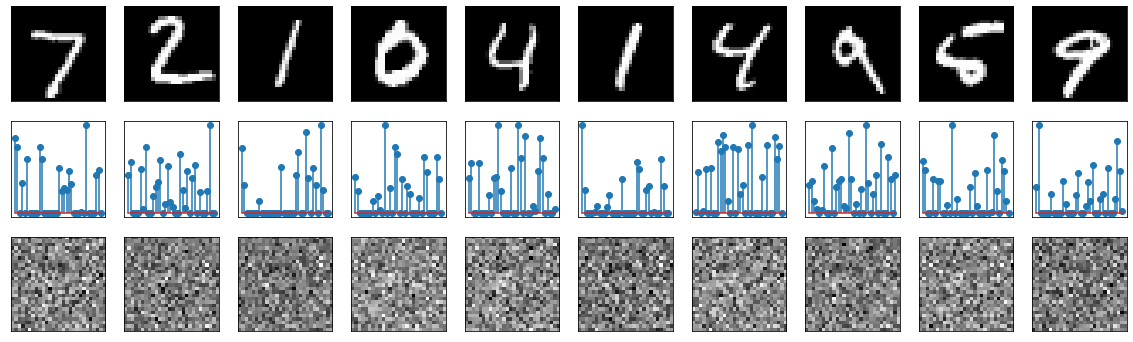

In [8]:
main()